### Q. 정류장 별 나가고 들어오는 자전거 수가 비슷한지?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
journeys = pd.read_csv('journeys.csv')
stations = pd.read_csv('stations.csv')

print(journeys.shape)
print(stations.shape)

journeys.head(2)

(1542844, 14)
(773, 5)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550


In [3]:
stations.head(2)

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"


In [4]:
# 끝 정류장에 대한 정보를 journeys에 추가
data = pd.merge(journeys, stations, left_on = 'End Station ID', right_on = 'Station ID', how = 'left')

# Station ID는 End Station ID와 동일하므로 삭제
data = data.drop(['Station ID'], axis = 1)

# 시작 정류장에 대한 정보도 추가해야되기 때문에 Column값 변경
data.rename(columns={"Capacity":"End Capacity", "Latitude":"End Latitude", "Longitude":"End Longitude", "Station Name":"End Station Name"},inplace = True)

# 시작 정류장에 대한 정보를 journeys에 추가
data = pd.merge(data, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')

# Station ID는 Start Station ID와 동일하므로 삭제
data = data.drop(['Station ID'], axis = 1)

# Column값 변경
data.rename(columns={"Capacity":"Start Capacity", "Latitude":"Start Latitude", "Longitude":"Start Longitude", "Station Name":"Start Station Name"},inplace = True)

# 최종 데이터
print(data.shape)
data.head(2)

(1542844, 22)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,...,Start Minute,Start Station ID,End Capacity,End Latitude,End Longitude,End Station Name,Start Capacity,Start Latitude,Start Longitude,Start Station Name
0,2040.0,953,19,9,17,18,0,478,19,9,...,26,251,21.0,51.521889,-0.046670,"Stepney Green Station, Stepney",34.0,51.518908,-0.079249,"Brushfield Street, Liverpool Street"
1,1800.0,12581,19,9,17,15,21,122,19,9,...,51,550,23.0,51.521113,-0.078869,"Norton Folgate, Liverpool Street",23.0,51.521564,-0.039264,"Harford Street, Mile End"


In [5]:
# 정류장별 나가는 수
pd.pivot_table(data, index = 'Start Station ID', values = 'Journey Duration', aggfunc = 'count').head()

,Journey Duration
Start Station ID,
1,1269
2,2055
3,3337
4,1405
5,3335


In [6]:
# 정류장별 들어오는 수
pd.pivot_table(data, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count').head()

,Journey Duration
End Station ID,
1,877
2,2379
3,3786
4,1548
5,3596


In [7]:
# 정류장별 나가는 수 - 정류장별 들어오는 수
data_1 = pd.pivot_table(data, index = 'Start Station ID', values = 'Journey Duration', aggfunc = 'count') - pd.pivot_table(data, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count')
data_1 = data_1.rename(columns = {'Journey Duration' : 'Number of bicycles'})
data_1.head()

,Number of bicycles
Start Station ID,
1,392
2,-324
3,-449
4,-143
5,-261


In [8]:
data_1.describe()

,Number of bicycles
count,779.000000
mean,0.000000
std,294.470925
min,-3186.000000
25%,-59.000000
50%,12.000000
75%,93.000000
max,2005.000000


In [9]:
result = pd.merge(data_1, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')
result.to_csv('result.csv')

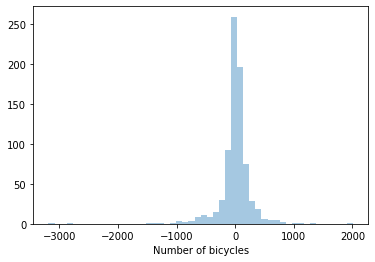

In [71]:
sns.distplot(result['Number of bicycles'],kde=False, rug=False)

#### 들어오고 나가는 자전거의 수가 대략적으로 정규분포와 유사하다는 것을 알 수 있다.

#### 모든 정류장의 들어오고 나가는 수가 0에 수렴하지는 않는다.

#### 1시그마 밖에 있는 정류장들을 살펴보자

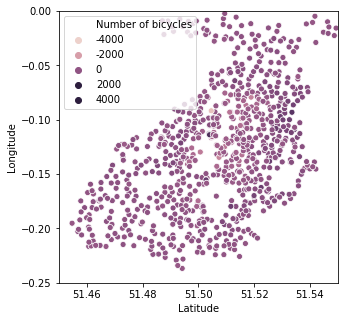

In [63]:
plt.figure(figsize=(5, 5))
plt.xlim(51.45,51.55)
plt.ylim(-0.25,0)
sns.scatterplot(x = 'Latitude',y = 'Longitude',hue = 'Number of bicycles', data = result)

#### 위도 경도에 따른 정류장 위치를 표시해주었고 그 위에다가 수 별로 색깔을 입혔습니다.
#### 자세히 보면 3시경 정류장들이 진한것을 알 수 있고, 바로 왼쪽의 정류장들의 색깔이 연한것을 볼 수 있습니다.
#### 진하다는 것(0보다 크다는 것)은 들어오는 수보다 나가는 수가 많다는 의미
#### 연하다는 것(0보다 작다는 것)은 나가는 수보다 들어오는 수가 많다는 의미

In [72]:
# 평균을 기준으로 양 옆으로 1시그마 밖으로 나온 값들의 데이터를 Outlier로 만들었습니다.
Outlier = pd.merge(data_1[data_1['Number of bicycles'].abs() > int(data_1.std()*1)], stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')
Outlier.head()

,Number of bicycles,Station ID,Capacity,Latitude,Longitude,Station Name
0,392,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,-324,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,-449,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,323,20,28,51.527736,-0.135273,"Drummond Street , Euston"
4,422,25,32,51.528833,-0.132250,"Doric Way , Somers Town"


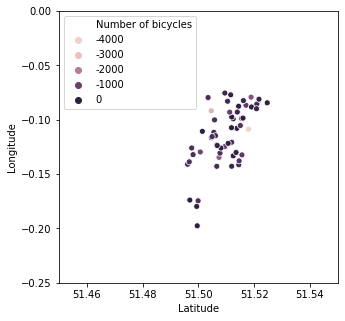

In [147]:
plt.figure(figsize=(5, 5))
plt.xlim(51.45,51.55)
plt.ylim(-0.25,0)
sns.scatterplot(x = 'Latitude',y = 'Longitude',hue = 'Number of bicycles', data = Outlier[Outlier['Number of bicycles'] < 0])

#### 이 그래프를 보고 오른쪽의 정류장의 자전거들이 주로 왼쪽의 정류장으로 가는 것을 예상할 수 있습니다.

#### 예상이 맞는지 확인

#### 1. 나가는 수가 많은 정류장의 최종 목적지는 어디인지.

In [73]:
Outlier.shape

(103, 6)

In [108]:
data.sort_values(by = 'Start Station ID', inplace = True)

In [109]:
data.head()

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,...,Start Minute,Start Station ID,End Capacity,End Latitude,End Longitude,End Station Name,Start Capacity,Start Latitude,Start Longitude,Start Station Name
1421682,666.0,6856,4,8,17,8,16,275,4,8,...,5,1,19.0,51.520044,-0.092176,"Barbican Centre, Barbican",19.0,51.529163,-0.10997,"River Street , Clerkenwell"
271290,600.0,1872,12,9,17,19,45,427,12,9,...,35,1,43.0,51.513970,-0.092940,"Cheapside, Bank",19.0,51.529163,-0.10997,"River Street , Clerkenwell"
1229509,988.0,12937,12,8,17,14,42,6,12,8,...,25,1,18.0,51.518117,-0.144228,"Broadcasting House, Marylebone",19.0,51.529163,-0.10997,"River Street , Clerkenwell"
1229508,987.0,8089,12,8,17,14,42,6,12,8,...,25,1,18.0,51.518117,-0.144228,"Broadcasting House, Marylebone",19.0,51.529163,-0.10997,"River Street , Clerkenwell"
1119783,534.0,13287,8,8,17,15,29,232,8,8,...,20,1,16.0,51.515010,-0.112753,"Carey Street, Holborn",19.0,51.529163,-0.10997,"River Street , Clerkenwell"


In [136]:
x = list(Outlier[Outlier['Number of bicycles'] > 0]['Station ID'])

def find_Start_Station_ID(data):
    for i in x:
        if data == i:
            return data

Start_Station = data[data['Start Station ID'].apply(find_Start_Station_ID) > 0]

Start_Station.head()

In [138]:
Start_Station = pd.pivot_table(Start_Station, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count')

Start_Station = pd.merge(Start_Station, stations, left_on = 'End Station ID', right_on = 'Station ID', how = 'left')

Start_Station.head()

,Journey Duration,Station ID,Capacity,Latitude,Longitude,Station Name
0,196,1.0,19.0,51.529163,-0.109970,"River Street , Clerkenwell"
1,77,2.0,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,813,3.0,32.0,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,157,4.0,23.0,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,138,5.0,27.0,51.493130,-0.156876,"Sedding Street, Sloane Square"


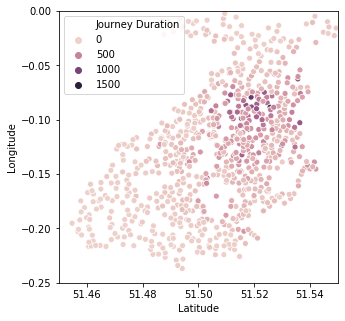

In [163]:
plt.figure(figsize=(5, 5))
plt.xlim(51.45,51.55)
plt.ylim(-0.25,0)
sns.scatterplot(x = 'Latitude',y = 'Longitude',hue = 'Journey Duration', data = Start_Station)

In [172]:
SS = Start_Station[Start_Station['Journey Duration'] > (Start_Station['Journey Duration'].mean() + Start_Station['Journey Duration'].std())]

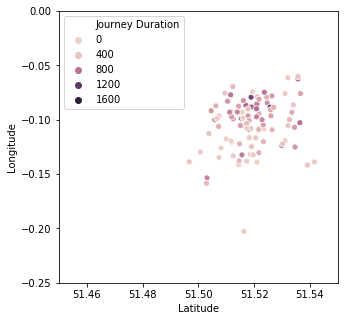

In [175]:
plt.figure(figsize=(5, 5))
plt.xlim(51.45,51.55)
plt.ylim(-0.25,0)
sns.scatterplot(x = 'Latitude',y = 'Longitude',hue = 'Journey Duration', data = SS)

#### 주로 왼쪽으로 가는 것을 확인